In [4]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [10]:
EmpPerformance_data=pd.read_excel('C:/Users/user/Desktop/Data Science/INX Future Inc Employee Performance - Project/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xlsx')
EmpPerformance_data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [11]:
EmpPerformance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

The project used a dataset containing employee data. The primary objective is to predict employee performance based on various factors. The dataset had 1,200 entries including datatypes: integers and object. The data has 28 columns.

In [17]:
percentage_missing = EmpPerformance_data.isnull().sum() / EmpPerformance_data.shape[0] * 100
percentage_missing

EmpNumber                       0.0
Age                             0.0
Gender                          0.0
EducationBackground             0.0
MaritalStatus                   0.0
EmpDepartment                   0.0
EmpJobRole                      0.0
BusinessTravelFrequency         0.0
DistanceFromHome                0.0
EmpEducationLevel               0.0
EmpEnvironmentSatisfaction      0.0
EmpHourlyRate                   0.0
EmpJobInvolvement               0.0
EmpJobLevel                     0.0
EmpJobSatisfaction              0.0
NumCompaniesWorked              0.0
OverTime                        0.0
EmpLastSalaryHikePercent        0.0
EmpRelationshipSatisfaction     0.0
TotalWorkExperienceInYears      0.0
TrainingTimesLastYear           0.0
EmpWorkLifeBalance              0.0
ExperienceYearsAtThisCompany    0.0
ExperienceYearsInCurrentRole    0.0
YearsSinceLastPromotion         0.0
YearsWithCurrManager            0.0
Attrition                       0.0
PerformanceRating           

In [14]:
#Check for duplicates
EmpPerformance_data.duplicated().sum()

0

The dataset EmpPerformance_data did not have any missing values or duplicates.

In [15]:
# find the number of unique values in each column - the distict values will help us understand the disitibution of data ata hand.
EmpPerformance_data.nunique()

EmpNumber                       1200
Age                               43
Gender                             2
EducationBackground                6
MaritalStatus                      3
EmpDepartment                      6
EmpJobRole                        19
BusinessTravelFrequency            3
DistanceFromHome                  29
EmpEducationLevel                  5
EmpEnvironmentSatisfaction         4
EmpHourlyRate                     71
EmpJobInvolvement                  4
EmpJobLevel                        5
EmpJobSatisfaction                 4
NumCompaniesWorked                10
OverTime                           2
EmpLastSalaryHikePercent          15
EmpRelationshipSatisfaction        4
TotalWorkExperienceInYears        40
TrainingTimesLastYear              7
EmpWorkLifeBalance                 4
ExperienceYearsAtThisCompany      37
ExperienceYearsInCurrentRole      19
YearsSinceLastPromotion           16
YearsWithCurrManager              18
Attrition                          2
P

Explanatory Data Analysis

In [116]:
# create a function to plot a countplot and a boxplot for each categorical column


import seaborn as sns
import matplotlib.pyplot as plt

def plot_categoricals(data, column):
    # Plot countplot (barplot of counts)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.countplot(x=column, data=EmpPerformance_data)
    plt.title(f'Countplot of {column}') 
    plt.xticks(rotation=90)
    
    # Plot boxplot
    plt.subplot(1, 2, 2)
    sns.lineplot(x=column, y='PerformanceRating', data=EmpPerformance_data)
    plt.title(f'Lineplot of {column} vs PerformanceRating')
    plt.xticks(rotation=90)
    
    plt.tight_layout()
    
    plt.show()

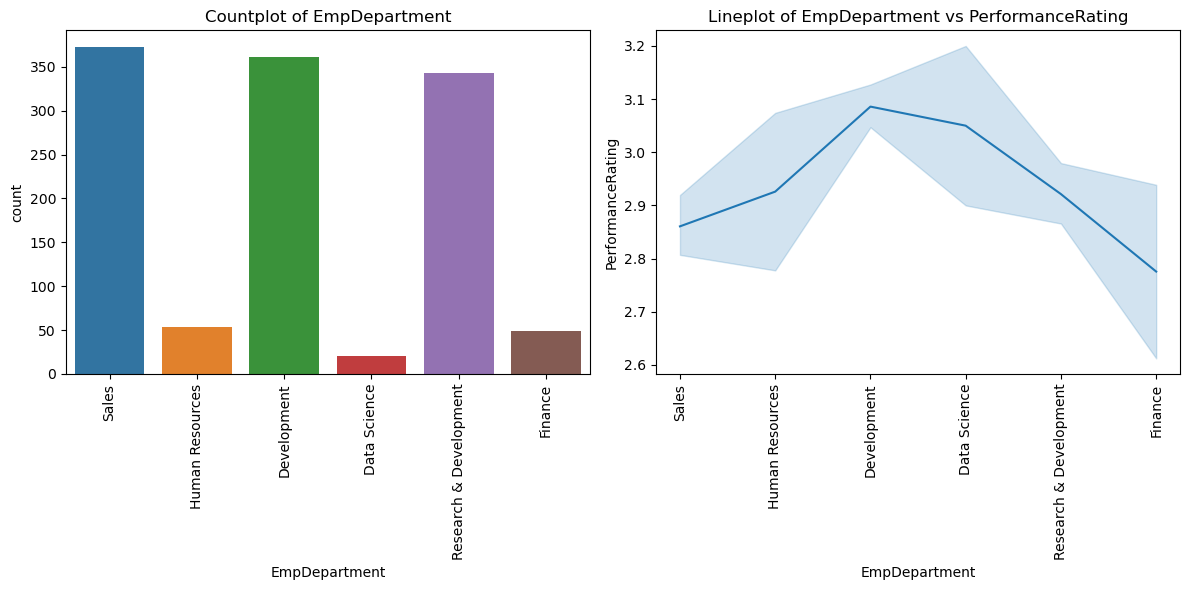

In [117]:
# plot the categorical columns
plot_categoricals(EmpPerformance_data, 'EmpDepartment')

The Countplot of EmpDeparment shows the number of employees in INX Future Inc including Sales, Human Resources, Development, Data Science, and Research & Development. The sales Department has the most employees followed by Development then Research & Development.
The Lineplot compares the distribution of performance ratings across different departments. The performance rating scale appears to range from approximately 2.6 to 3.2.  The perfomance of employees in Sales Department lies at aoin

In [53]:
#plot histograms for numerical columns

def plot_numerical(data, column):
    # create a histogram
    sns.histplot(data = EmpPerformance_data, x = column, kde = True)
    plt.show()

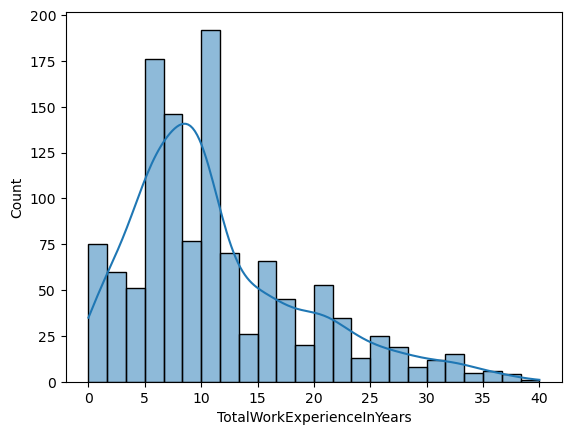

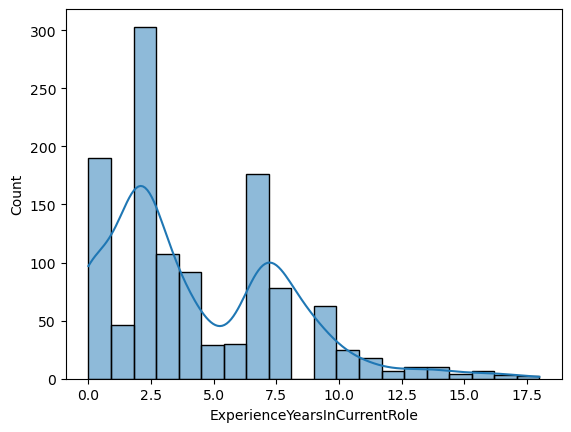

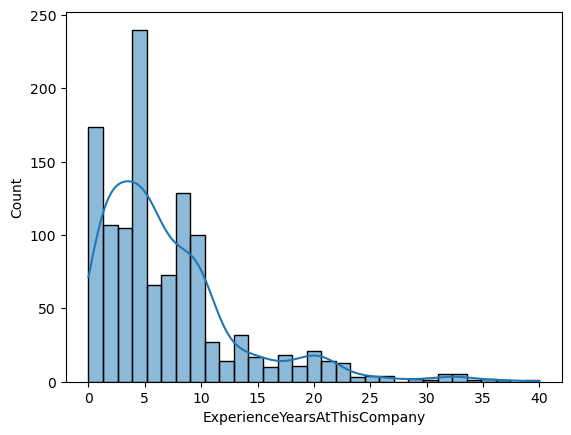

In [57]:
plot_numerical(EmpPerformance_data, 'TotalWorkExperienceInYears')
plot_numerical(EmpPerformance_data, 'ExperienceYearsInCurrentRole')
plot_numerical(EmpPerformance_data, 'ExperienceYearsAtThisCompany')

1.	The chart is a combination of a histogram and a line graph. The Histogram represent the frequency count of total work experience in years. The horizontal axis ranges from 0 to 40 years of experience. The vertical axis represents the count of individuals, ranging from 0 to 200. Most individuals seem to have between approximately 5 and 10 years of work experience, with the highest frequency just above 10 years. The Line graph overlays the histogram. It shows a distribution curve that fits over the top of the histogram bars.  The curve peaks where there is the highest frequency of work experience and tapers off towards both ends of the experience range.
2.	The graph represent the frequency count of employees by “Experience Years in Current Role,” ranging from 0 to 18 years. Most individuals appear to have approximately 2.5 years of experience in their current role. 
3.	The graph shows that most employees at INX Future Inc have 0 to 10 years of experience at the company.


Transform the data. 
Since the dataset has object data types, I  convert these labels to numeric (int64) form, so they become machine-readable through label encoding.

First, I have to find object data types. 

In [58]:
cat_col = EmpPerformance_data.select_dtypes(include = 'object').columns
cat_col

Index(['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime',
       'Attrition'],
      dtype='object')

In [60]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(data):
    le = LabelEncoder()
    for column in label_list:
        data[column] = le.fit_transform(data[column])
    return data

label_list = ['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus',
              'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime',
              'Attrition']

# Create a new name for the dataset where categorical columns have been encoded into numerical values using LabelEncoder
transformed_data = label_encoder(EmpPerformance_data.copy())

# Display transformed data
transformed_data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,0,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,1,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,2,40,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,3,41,1,0,0,3,8,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,4,60,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3


In [66]:
#confirm if data as been encoded
transformed_data.dtypes

EmpNumber                       int32
Age                             int64
Gender                          int32
EducationBackground             int32
MaritalStatus                   int32
EmpDepartment                   int32
EmpJobRole                      int32
BusinessTravelFrequency         int32
DistanceFromHome                int64
EmpEducationLevel               int64
EmpEnvironmentSatisfaction      int64
EmpHourlyRate                   int64
EmpJobInvolvement               int64
EmpJobLevel                     int64
EmpJobSatisfaction              int64
NumCompaniesWorked              int64
OverTime                        int32
EmpLastSalaryHikePercent        int64
EmpRelationshipSatisfaction     int64
TotalWorkExperienceInYears      int64
TrainingTimesLastYear           int64
EmpWorkLifeBalance              int64
ExperienceYearsAtThisCompany    int64
ExperienceYearsInCurrentRole    int64
YearsSinceLastPromotion         int64
YearsWithCurrManager            int64
Attrition   

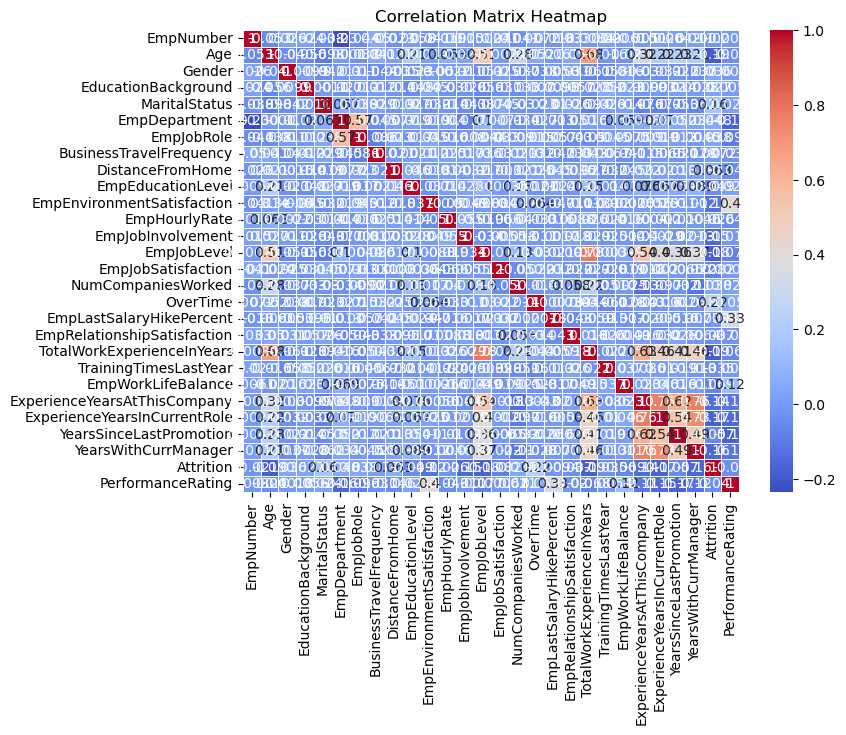

In [108]:
df = pd.DataFrame(transformed_data)
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [110]:
threshold = 0.5  # Set your correlation threshold

# Empty list to store pairs
correlated_pairs = []

# Iterate through the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):  # Avoid diagonal and already compared pairs
        if abs(correlation_matrix.iloc[i, j]) >= threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
            correlated_pairs.append(pair)

# Print the correlated pairs
for pair in correlated_pairs:
    print(f"Correlation between {pair[0]} and {pair[1]} is {pair[2]}")

Correlation between Age and EmpJobLevel is 0.5091391713818485
Correlation between Age and TotalWorkExperienceInYears is 0.6808863776423193
Correlation between EmpDepartment and EmpJobRole is 0.5689727300237089
Correlation between EmpJobLevel and TotalWorkExperienceInYears is 0.7842285875836238
Correlation between EmpJobLevel and ExperienceYearsAtThisCompany is 0.5403771052798658
Correlation between TotalWorkExperienceInYears and ExperienceYearsAtThisCompany is 0.633554768463762
Correlation between ExperienceYearsAtThisCompany and ExperienceYearsInCurrentRole is 0.764101587123479
Correlation between ExperienceYearsAtThisCompany and YearsSinceLastPromotion is 0.620230269214471
Correlation between ExperienceYearsAtThisCompany and YearsWithCurrManager is 0.7592581958041325
Correlation between ExperienceYearsInCurrentRole and YearsSinceLastPromotion is 0.5406004608224716
Correlation between ExperienceYearsInCurrentRole and YearsWithCurrManager is 0.7289728836492501


Correlation between EmpJobLevel and TotalWorkExperienceInYears is 0.7842285875836238
Correlation between ExperienceYearsAtThisCompany and ExperienceYearsInCurrentRole is 0.764101587123479
Correlation between ExperienceYearsAtThisCompany and YearsWithCurrManager is 0.7592581958041325


Define Problem Statement: Building a model to predict employee performance at INX Future Inc

First, I split the data into training and testing sets:
I will alos evaluate the model accuracy on both training and test datasets using .score

In [67]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [118]:
#split the data into the target variables and features 
#make PerformanceRating column as the target variable 

X = transformed_data.drop('PerformanceRating', axis=1)
y = transformed_data['PerformanceRating']

In [69]:
# Split the data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((960, 27), (240, 27), (960,), (240,))

In [71]:
#Feature Scaling to rescale data to have a mean of 0 and standard deviation of 1 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Implement Linear and Classification Models

I will build 4 models and compare their accuracy scores.

1. Logistic Regression 

In [72]:
# train a linear regression model
from sklearn.linear_model import LinearRegression

# instantiate the model
model = LinearRegression()

# fit the model to the training data
model.fit(X_train, y_train)

# score model on the testing data
model.score(X_test, y_test)

0.26294953891581385

In [86]:
# make predictions  
y_pred = model.predict(X_test)

# check our r2 score
from sklearn.metrics import r2_score, mean_squared_error

print('R2 score: ', r2_score(y_test, y_pred))
print('Mean square error: ', mean_squared_error(y_test, y_pred))

R2 score:  0.26294953891581385
Mean square error:  0.17192725685984592


In [77]:
#Display the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print('Intercept: ', model.intercept_)
print(coefficients)

Intercept:  2.9375
                              Coefficient
EmpNumber                       -0.009214
Age                             -0.009316
Gender                          -0.003171
EducationBackground             -0.010278
MaritalStatus                    0.008972
EmpDepartment                   -0.067689
EmpJobRole                      -0.023212
BusinessTravelFrequency         -0.011617
DistanceFromHome                -0.018447
EmpEducationLevel                0.023736
EmpEnvironmentSatisfaction       0.224279
EmpHourlyRate                   -0.007910
EmpJobInvolvement               -0.011418
EmpJobLevel                      0.002006
EmpJobSatisfaction               0.004541
NumCompaniesWorked               0.009285
OverTime                         0.017039
EmpLastSalaryHikePercent         0.192717
EmpRelationshipSatisfaction      0.001943
TotalWorkExperienceInYears       0.004124
TrainingTimesLastYear           -0.012744
EmpWorkLifeBalance               0.060303
ExperienceYears

2. Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
# Create a logistic regression mode

log_reg = LogisticRegression()

# Fit the model to the data
log_reg.fit(X_train, y_train)

# Print the coefficients
print('Intercept:', log_reg.intercept_)
print('Coefficients:', log_reg.coef_)

Intercept: [-0.62753108  2.31142968 -1.68389859]
Coefficients: [[ 0.11573967 -0.05603562 -0.03594422  0.07946131 -0.05984622  0.64324693
  -0.02344529  0.05282709  0.20685757 -0.21594663 -1.55592978  0.07446258
  -0.00321173 -0.0267767  -0.04581335 -0.01855347 -0.1452328  -0.89613718
   0.02714383 -0.004853    0.08478779 -0.40416283 -0.35764256  0.60790997
   0.45255599  0.07584314 -0.06394842]
 [-0.05605869 -0.05923659  0.04796754 -0.02255344 -0.06559267 -0.38781973
   0.10352618  0.07746695  0.0177887   0.0805203   0.44415748 -0.09613629
   0.0693249  -0.10472965 -0.03966486 -0.08533858  0.21113467 -0.75602454
  -0.04066042  0.20744376  0.09601464 -0.13773855  0.01985534 -0.05938028
  -0.15978839 -0.12055875 -0.02091777]
 [-0.05968098  0.11527221 -0.01202332 -0.05690787  0.12543889 -0.2554272
  -0.08008089 -0.13029405 -0.22464627  0.13542633  1.1117723   0.02167371
  -0.06611318  0.13150635  0.08547821  0.10389205 -0.06590187  1.65216171
   0.01351659 -0.20259076 -0.18080244  0.54190

In [84]:
# model accuracy
# Evaluate model accuracy on training data
train_accuracy = log_reg.score(X_train, y_train)
print('Training Accuracy:', train_accuracy)

# Evaluate model accuracy on test data
test_accuracy = log_reg.score(X_test, y_test)
print('Test Accuracy:', test_accuracy)

Training Accuracy: 0.5947916666666667
Test Accuracy: 0.5708333333333333


In [ ]:
3. DecisionTree Classifier

In [83]:
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier model
dt = DecisionTreeClassifier()

# Fit the model to the training data
dt.fit(X_train, y_train)

# Evaluate model accuracy on training data
train_accuracy = dt.score(X_train, y_train)
print('Training Accuracy:', train_accuracy)

# Evaluate model accuracy on test data
test_accuracy = dt.score(X_test, y_test)
print('Test Accuracy:', test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.8875


4. Support Vector Machines (SVMs) 

In [97]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np


# Create a Support Vector Classifier (SVC) model
svc = SVC(kernel='linear', C=1.0, random_state=42)

# Fit the model to the training data
svc.fit(X_train, y_train)

# Evaluate model accuracy on test data
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy:', accuracy)



Test Accuracy: 0.8458333333333333


In [150]:
print(X.columns)

y.unique()

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')


array([3, 4, 2], dtype=int64)

In [151]:
X.columns.unique()

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [144]:
df = pd.DataFrame(X.columns)
print(df)

                               0
0                      EmpNumber
1                            Age
2                         Gender
3            EducationBackground
4                  MaritalStatus
5                  EmpDepartment
6                     EmpJobRole
7        BusinessTravelFrequency
8               DistanceFromHome
9              EmpEducationLevel
10    EmpEnvironmentSatisfaction
11                 EmpHourlyRate
12             EmpJobInvolvement
13                   EmpJobLevel
14            EmpJobSatisfaction
15            NumCompaniesWorked
16                      OverTime
17      EmpLastSalaryHikePercent
18   EmpRelationshipSatisfaction
19    TotalWorkExperienceInYears
20         TrainingTimesLastYear
21            EmpWorkLifeBalance
22  ExperienceYearsAtThisCompany
23  ExperienceYearsInCurrentRole
24       YearsSinceLastPromotion
25          YearsWithCurrManager
26                     Attrition


In [149]:
#Use the trained model to predict on the test data (X_test), and print the predictions.
#Visualize the decision tree using plot_tree() function from sklearn.tree.

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create a DecisionTreeClassifier model
dt = DecisionTreeClassifier()

# Fit the model to the training data
dt.fit(X_train, y_train)

# Make predictions on test data
y_pred = dt.predict(X_test)

# Extract feature names from your DataFrame df
feature_names = list(df.columns)

# Visualize the decision tree (using plot_tree)
plt.figure(figsize=(200, 100))
plot_tree(dt, filled=True, feature_names=feature_names, class_names=y.unique())
plt.title('Decision Tree Visualization')
plt.show()

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['EmpNumber'], dtype='object') instead.

<Figure size 20000x10000 with 0 Axes>